# Features visualization with TSNE

---

### 1) Setup

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE


In [3]:
SEED = 42

TRAIN_CLINICAL_FILENAME = "train_set_clinical.csv"
TEST_CLINICAL_FILENAME = "test_set_clinical.csv"

TRAIN_CLINICAL_ARTIGO_FILENAME = "E:\\work\\MAC5832_prognostico_covid\\train_set_clinical.csv"
TEST_CLINICAL_ARTIGO_FILENAME = "E:\\work\\MAC5832_prognostico_covid\\test_set_clinical.csv"

---

### 2) Read and Preprocess Data

In [5]:
datasets = {
    'onlynormalized': {
        'train': pd.read_csv(TRAIN_CLINICAL_FILENAME, sep=";", index_col="ID"),
        'test': pd.read_csv(TEST_CLINICAL_FILENAME, sep=";", index_col="ID")
    },
    'artigo': {
        'train': pd.read_csv(TRAIN_CLINICAL_ARTIGO_FILENAME, sep=";", index_col="ID"),
        'test':  pd.read_csv(TEST_CLINICAL_ARTIGO_FILENAME, sep=";", index_col="ID")
    }

}


In [6]:
##### Preprocessing all datasets
for d_key in datasets.keys():
    for d_type in datasets[d_key].keys():
        
        # Drop NaN Values 
        datasets[d_key][d_type].dropna(inplace=True)
        
        # Convert Sex column to boolean (Female: 1, Male: 0)
        datasets[d_key][d_type]["Sex"] = np.where(datasets[d_key][d_type]["Sex"]=="F", 1, 0)

In [7]:
# Features do Boruta

selectedFeatures = {
       'onlynormalized': 
       ['Freq.1324.08044804632', 'Freq.1715.32907573994',
       'Freq.1793.31292765446', 'Freq.2032.95119529926',
       'Freq.2148.55916353654', 'Freq.2182.52259691583',
       'Freq.2186.33577081196', 'Freq.2242.07973381149',
       'Freq.2761.81291676166', 'Freq.3044.21704373186',
       'Freq.3414.71158220371', 'Freq.3425.70211639867',
       'Freq.3912.82100942603', 'Freq.4266.3135397872',
       'Freq.4282.69712175929', 'Freq.4305.85988898402',
       'Freq.4318.14922038936', 'Freq.4395.12541812139',
       'Freq.4773.1748593189', 'Freq.4823.05474215093',
       'Freq.5085.12753419191', 'Freq.5224.39772946441',
       'Freq.5433.51287445961', 'Freq.6079.05181901815',
       'Freq.7501.51838000843', 'Freq.7738.28945568542',
       'Freq.8943.76551923189'],
       'artigo': 
       ['Freq.1324.07107187346', 'Freq.1399.46591504505',
       'Freq.1522.99914751846', 'Freq.1715.83254187774',
       'Freq.1794.21713030157', 'Freq.2032.98713905056',
       'Freq.2100.44990262345', 'Freq.2182.54012190969',
       'Freq.2187.26929655148', 'Freq.2241.01398322552',
       'Freq.2395.92741519698', 'Freq.2461.57721259156',
       'Freq.2822.17822957638', 'Freq.2981.05105455515',
       'Freq.3083.87231952593', 'Freq.3795.45160708473',
       'Freq.3983.61553339652', 'Freq.4266.97846896688',
       'Freq.4283.95182164633', 'Freq.4307.03317519015',
       'Freq.4395.11277752994', 'Freq.4495.09063766933',
       'Freq.4659.55667096198', 'Freq.4823.08140765752',
       'Freq.5084.14952111257', 'Freq.5224.84719303067',
       'Freq.5272.6322523475', 'Freq.5433.53206707083',
       'Freq.5485.69282171011', 'Freq.5720.79450801948',
       'Freq.7738.2889532685', 'Freq.8943.8000787644', 'Freq.9098.3102509794']

} 

---

In [4]:
# Get Features
def getFeaturesTargets(dataset_name, boruta_features=False):
    dataset = datasets[dataset_name]
    X, y = dataset['train'].drop("Group", axis=1), dataset['train']["Group"]
    if boruta_features:
        X = X[selectedFeatures[dataset_name]]
    return (X, y)

### 1) Dataset apenas normalizado


In [13]:
def plot_tsne(X, y, title):
    _, ax = plt.subplots()
    X = MinMaxScaler().fit_transform(X)
    ax.scatter(
        *X[y == 'MILD'].T,
        marker=f"o",
        s=60,
        color='b',
        alpha=0.425,
        zorder=2,
    )

    ax.scatter(
        *X[y == 'SEVERE'].T,
        marker=f"*",
        s=60,
        color='r',
        alpha=0.425,
        zorder=2,
    )
    ax.set_title(title)
    red_patch = mpatches.Patch(color='red', label='SEVERE')
    blue_patch = mpatches.Patch(color='blue', label='MILD')
    ax.legend(handles=[red_patch, blue_patch])
    ax.axis("off")


def project_tsne(dataset_name, boruta_features=False, perplexity=30):
    X, y = getFeaturesTargets(dataset_name, boruta_features)
    transformer = TSNE(
        n_components=2,
        init="pca",
        learning_rate="auto",
        n_iter=2000,
        n_iter_without_progress=150,
        n_jobs=2,
        random_state=0,
        perplexity=perplexity
    )
    projection = transformer.fit_transform(X, y)
    plot_tsne(projection, y, f'TSNE dataset: {dataset_name}, boruta: {boruta_features}, perplexity: {perplexity}')

    return 

e:\Apps\miniconda3\envs\py310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
e:\Apps\miniconda3\envs\py310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


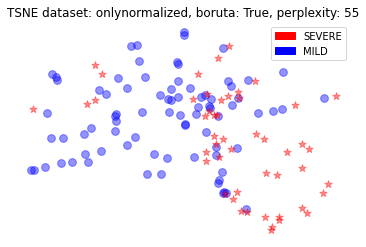

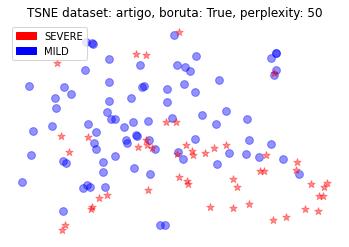

In [38]:
project_tsne('onlynormalized', boruta_features=True, perplexity=55)
project_tsne('artigo', boruta_features=True, perplexity=50)

plt.show()